#### Well so this is the same thing as in getting_comments ,getting the necessary lib and initilization of Mongodb database and creating a new collection to store the data

In [10]:
import pickle
from collections import defaultdict
import os
import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors
from pymongo import MongoClient
import os
import pandas as pd


In [ ]:
with open('data\\ted_video_links_2730.pkl', 'rb') as picklefile:
    links_video_ted = pickle.load(picklefile)

In [7]:
len(links_video_ted)

2730

In [8]:
links_video_ted[1]

'bNmRr-BYnxA'

In [3]:
client = MongoClient()
client.list_database_names()

['admin', 'config', 'local', 'ted']

In [5]:
db = client['ted']
# db.create_collection("ted_stats")
ted_stats = db.get_collection('ted_stats')

In [7]:
db.list_collection_names()

['ted_stats', 'ted_comments', 'ted_transcripts']

#### Using Google api to get data, again use your own oAuth id and use this code

In [6]:
import os
import google_auth_oauthlib.flow
import googleapiclient.discovery
from tqdm import tqdm

scopes = ["https://www.googleapis.com/auth/youtube.readonly"]

def main():
    # Disable OAuthlib's HTTPS verification when running locally.
    # *DO NOT* leave this option enabled in production.
    os.environ["OAUTHLIB_INSECURE_TRANSPORT"] = "1"

    api_service_name = "youtube"
    api_version = "v3"
    client_secrets_file = "D:\\client_secret_974472596179-tcgvota4j3r5eopj9nlmp089kqlitcv9.apps.googleusercontent.com.json"

    # Get credentials and create an API client
    flow = google_auth_oauthlib.flow.InstalledAppFlow.from_client_secrets_file(
        client_secrets_file, scopes)
    credentials = flow.run_local_server(port=8080, prompt='consent')
    youtube = googleapiclient.discovery.build(
        api_service_name, api_version, credentials=credentials)

    total_videos = len(links_video_ted)

    # Add tqdm progress bar
    for url in tqdm(links_video_ted, total=total_videos, desc="Fetching Video Stats", unit="video"):
        try:
            request = youtube.videos().list(part="snippet,contentDetails,statistics", id=url)
            response = request.execute()
            ted_stats.insert_one(response)
        except:
            continue

if __name__ == "__main__":
    main()


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=974472596179-tcgvota4j3r5eopj9nlmp089kqlitcv9.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.readonly&state=w2oXJ3Jo5lUQTPQI7lwUquSazz1nrp&prompt=consent&access_type=offline


Fetching Video Stats: 100%|██████████| 2730/2730 [07:29<00:00,  6.08video/s]


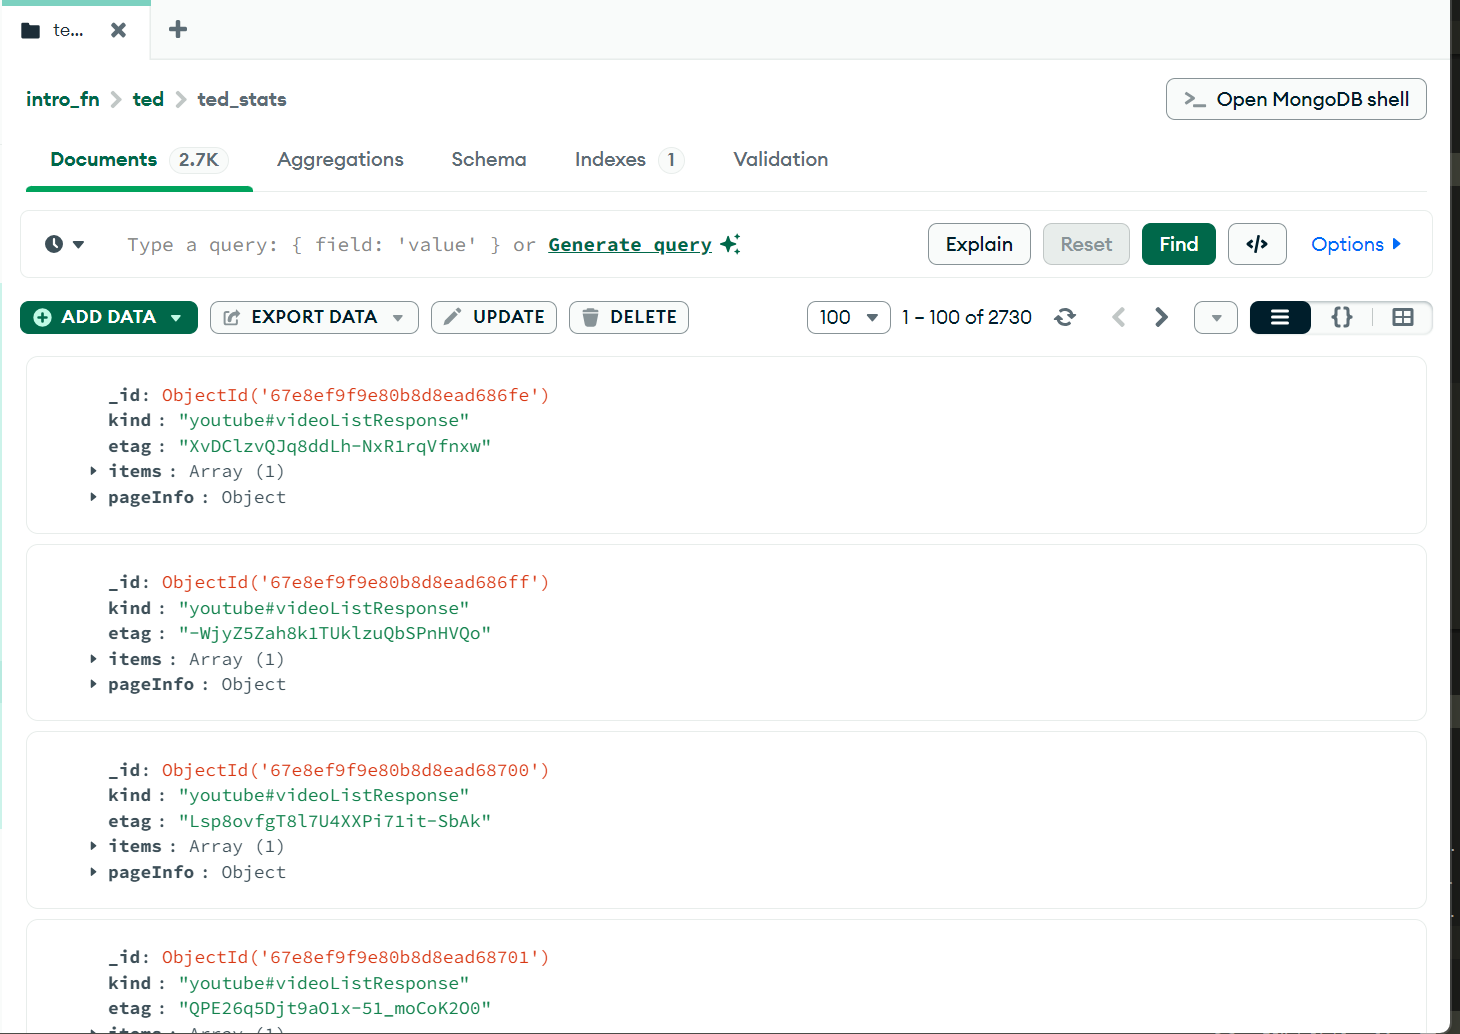